<a href="https://colab.research.google.com/github/SamuelBFG/DL-studies/blob/master/IA353/EF1p1_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

# TRAINING SET
train1 = scipy.io.loadmat('/content/train1.mat')
train2 = scipy.io.loadmat('/content/train2.mat')

Xtr1 = train1['Xtr']
Str1 = train1['Str']
Xtr2 = train2['Xtr']
Str2 = train2['Str']

Xtr = np.append(Xtr1, Xtr2, axis=0)
Str = np.append(Str1, Str2, axis=0)

# VALIDATION SET
valid = scipy.io.loadmat('/content/valid.mat')

Xv = valid['Xv']
Sv = valid['Sv']

# TEST SET
test = scipy.io.loadmat('/content/test.mat')

Xt = test['Xt']
St = test['St']

print('Training Set:')
print('Xtr shape: ', Xtr.shape)
print('Str shape: ', Str.shape)

print('Validation Set:')
print('Xv shape:', Xv.shape)
print('Sv shape:', Sv.shape)

print('Test Set:')
print('Xt shape:', Xt.shape)
print('St shape:', St.shape)

Training Set:
Xtr shape:  (40000, 3072)
Str shape:  (40000, 10)
Validation Set:
Xv shape: (10000, 3072)
Sv shape: (10000, 10)
Test Set:
Xt shape: (10000, 3072)
St shape: (10000, 10)


## Data processing

### Add ones as the first column of X

In [2]:
ones = np.ones((Xtr.shape[0], 1))
ones2 = np.ones((Xv.shape[0], 1))

Xtr = np.append(ones, Xtr, axis = 1)
Xv = np.append(ones2, Xv, axis = 1)
Xtr.shape

(40000, 3073)

In [3]:
N, m = Xtr.shape 
Nv, mv = Xv.shape

v_c = []
v_hit_rate_tr = []
v_hit_rate_v = []
hit_rate_max = 0


print('Crude search for the regularization coefficient:')

for p in np.arange(-4, 20, 2, dtype=float):
  C = 2**(p)
  v_c.append(C) # Vector containing every value of crude search

  # Regularized least squares (Ridge Regression)
  w = np.dot(np.dot(np.linalg.inv(np.dot(Xtr.T, Xtr) + C * np.identity(m)), Xtr.T), Str)

  # Training set:
  S_est_tr = np.dot(Xtr, w) 
  hit_tr = 0 # To count when the classifier is correct (for every sample)
  for i in range(N):
    indmax = np.argmax(S_est_tr[i,:], axis=0)
    if Str[i,indmax] > 0.5:
      hit_tr+=1
  
  hit_rate_tr = hit_tr/N
  v_hit_rate_tr.append(hit_rate_tr)

  # Validation set:
  S_est_v = np.dot(Xv, w) 
  hit_v = 0 # To count when the classifier is correct (for every sample)
  for i in range(Nv):
    indmax = np.argmax(S_est_v[i,:], axis=0)
    if Sv[i,indmax] > 0.5:
      hit_v+=1
  
  hit_rate_v = hit_v/Nv
  v_hit_rate_v.append(hit_rate_v)

  if hit_rate_v >= hit_rate_max:
    hit_rate_max = hit_rate_v
    c_min = C
    w_min = w


Crude search for the regularization coefficient:


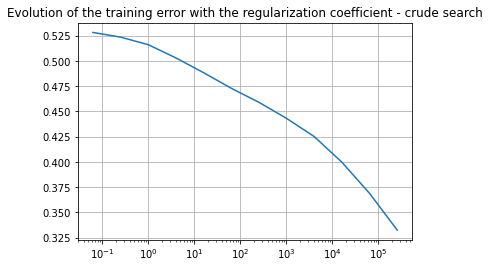

In [4]:
plt.semilogx(v_c, v_hit_rate_tr)
plt.title('Evolution of the training error with the regularization coefficient - crude search')
plt.grid(True)
plt.show()

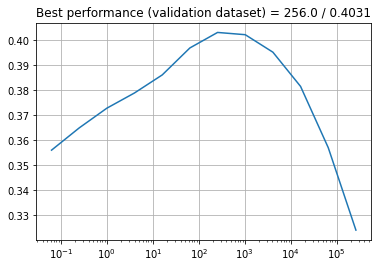

In [5]:
plt.title('Best performance (validation dataset) = {} / {}'.format(c_min, hit_rate_max))
plt.semilogx(v_c, v_hit_rate_v)
plt.grid(True)
plt.show()

In [7]:
v_c2 = []
v_hit_rate_tr2 = []
v_hit_rate_v2 = []
hit_rate_max2 = 0

"""
 Given the best crude value for the regularization coeffcient, the refined
 search will consider the interval between the previous and the subsequent
 crude values. 
"""

print('Refined search for the regularization coefficient:')

step = 0.1*(4*c_min-c_min/4)
for p in np.arange(c_min/4, 4*c_min, step, dtype=float):
  C = p
  v_c2.append(C) # Vector containing every value of crude search

  # Regularized least squares (Ridge Regression)
  w = np.dot(np.dot(np.linalg.inv(np.dot(Xtr.T, Xtr) + C * np.identity(m)), Xtr.T), Str)

  # Training set:
  S_est_tr = np.dot(Xtr, w) 
  hit_tr = 0 # To count when the classifier is correct (for every sample)
  for i in range(N):
    indmax = np.argmax(S_est_tr[i,:], axis=0)
    if Str[i,indmax] > 0.5:
      hit_tr+=1
  
  hit_rate_tr = hit_tr/N
  v_hit_rate_tr2.append(hit_rate_tr)

  # Validation set:
  S_est_v = np.dot(Xv, w) 
  hit_v = 0 # To count when the classifier is correct (for every sample)
  for i in range(Nv):
    indmax = np.argmax(S_est_v[i,:], axis=0)
    if Sv[i,indmax] > 0.5:
      hit_v+=1
  
  hit_rate_v = hit_v/Nv
  v_hit_rate_v2.append(hit_rate_v)

  if hit_rate_v >= hit_rate_max2:
    hit_rate_max2 = hit_rate_v
    c_min2 = C
    w_min2 = w

Refined search for the regularization coefficient:


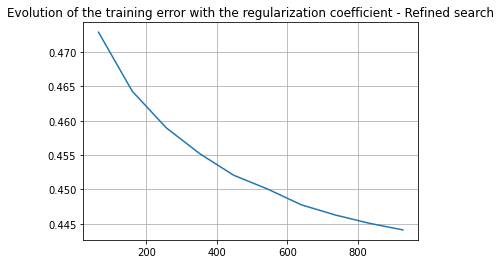

In [8]:
plt.plot(v_c2, v_hit_rate_tr2)
plt.title('Evolution of the training error with the regularization coefficient - Refined search')
plt.grid(True)
plt.show()

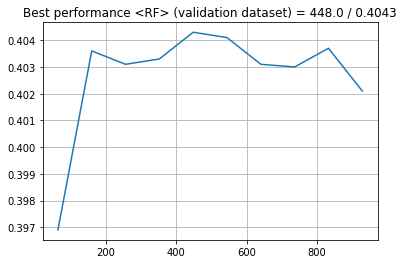

In [9]:
plt.title('Best performance <RF> (validation dataset) = {} / {}'.format(c_min2, hit_rate_max2))
plt.plot(v_c2, v_hit_rate_v2)
plt.grid(True)
plt.show()

In [10]:
Xtot = np.append(Xtr, Xv, axis=0)
Stot = np.append(Str, Sv, axis=0)

w = np.dot(np.dot(np.linalg.inv(np.dot(Xtot.T, Xtot) + C * np.identity(m)), Xtot.T), Stot)

Nt, mt = Xt.shape

ones = np.ones((Nt, 1))
Xt = np.append(ones, Xt, axis = 1)

S_est_t = np.dot(Xt,w)
hit_t = 0

for i in range(Nt):
  indmax = np.argmax(S_est_t[i,:], axis=0)
  if St[i,indmax] > .5:
    hit_t+=1
  hit_rate_t = hit_t/Nt

print('Correct classification rate for the test dataset: {}'.format(hit_rate_t))

Correct classification rate for the test dataset: 0.4077


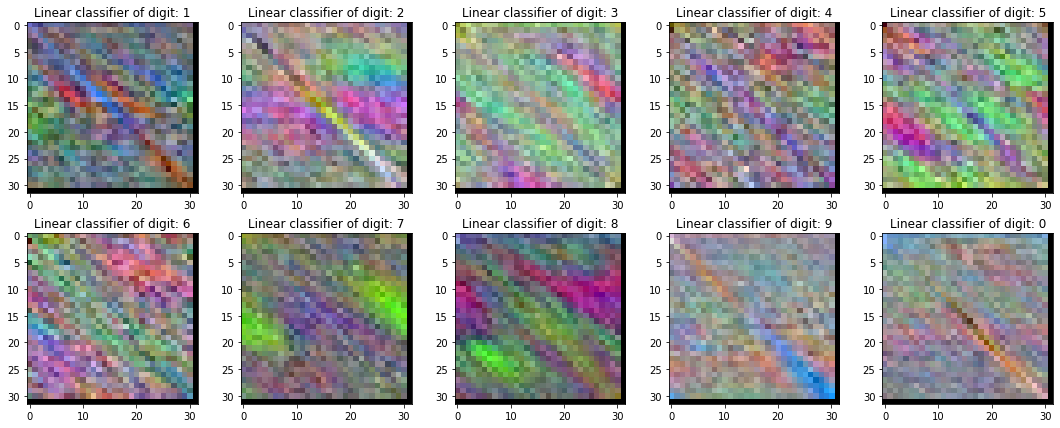

In [16]:
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
IM = np.zeros((32,32,3))
nr, nc = w.shape

for i in range(nc):
  if i == nc-1:
    ii = 0
  else:
    ii = i+1
  R = (w[1:1024,i] - np.ndarray.min(w[1:,i]))/(np.ndarray.max(w[1:,i] - np.ndarray.min(w[1:,i])))
  G = (w[1025:2048,i] - np.ndarray.min(w[1:,i]))/(np.ndarray.max(w[1:,i] - np.ndarray.min(w[1:,i])))
  B = (w[2049:,i] - np.ndarray.min(w[1:,i]))/(np.ndarray.max(w[1:,i] - np.ndarray.min(w[1:,i])))

  ind = 0

  for j in range(31):
    for k in range(31):
      IM[j,k,0] = R[ind]
      IM[j,k,1] = G[ind]
      IM[j,k,2] = B[ind]
      ind+=1
  ax = axes[i//num_col, i%num_col]
  ax.imshow(IM)
  ax.set_title('Linear classifier of digit: {}'.format(ii))

plt.tight_layout()
plt.show()